In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

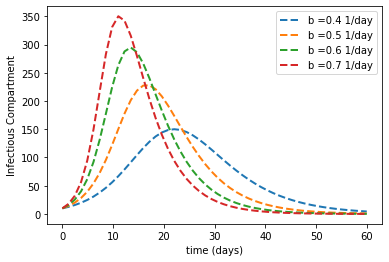

In [3]:
#PERTURBING INFECTION RATE

############################################################################################
############################################################################################
#STEP 1: definition of the dynamical system 

def SIRD(z, t, b, m, d):
    S = z[0] # Susceptible compartment
    I = z[1] # Infectious compartment
    R = z[2] # Recovered compartment
    D = z[3] # Deceased compartment
    
    dSdt = -b * S * (I/N)
    dIdt =  b * S * (I/N) - m * I - d * I
    dRdt =                  m * I
    dDdt =                          d * I
    
    return [dSdt, dIdt, dRdt, dDdt]
############################################################################################



############################################################################################
#STEP 2 :set initial conditions
z0 = [990, 10, 0, 0] # starting off with 990 healthy  and 10 infected people.
N = z0[0] + z0[1] + z0[2] # oi deceased de logizontai sto overall population.
############################################################################################



############################################################################################
#STEP 3: define time-points
t = np.linspace(0,60)
############################################################################################


############################################################################################
#STEP 4: assign values to fixed parameters
m = 0.2 # m persons per day recover
d = 0.005
############################################################################################


############################################################################################
#STEP 5: solve the model for different values of the parameter of interest and plot results

for b in np.arange(0.4, 0.8, 0.1):

#solve SIRD model (solver: odeint)
#b = 0.6 # b persons per day are infected

    z = odeint(SIRD, z0, t, args = (b, m, d))
    S = z[:,0]
    I = z[:,1]
    R = z[:,2]
    D = z[:,3]
    
#plot results
    plt.plot(t, I, '--', linewidth = 2, label = 'b =' + str(b)+ ' 1/day')

plt.xlabel('time (days)')
plt.ylabel('Infectious Compartment')
plt.legend()
plt.show()
############################################################################################